# **STARBUCKS CUSTOMERS SEGMENTATION**

**TABLE OF CONTENTS:**

1. Data Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preprocessing 
5. Customer Segementation
6. Model Training
7. Results and Visualizations
8. Intrepretation of clusters

**Importing Libraries**

In [1014]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1015]:
import warnings
warnings.filterwarnings("ignore")

# 1. Data Understanding

**Loading Datasets**

In [1016]:
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

**Portfolio Dataset**

This dataset is about offers sent to customers.

* `id`(str) - offer id
* `offer_type`(str) - type of offer; bogo, discount, or informational
* `difficulty`(int) - minimum required to be spent to complete an offer
* `reward`(int) - reward given for completing an offer
* `duration`(int) - time in days for an offer to be open
* `channels`(list) - communication channels used to market an offer.

In [1017]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


**Profile Dataset**

This is demographic data of customers.

* `age`(int) - age of the customer
* `became_member_on`(int) - date when customer created an app account
* `gender`(str) - gender of the customer; M, F, or O.
* `id`(str) - customer id
* `income`(float) - income of customer

In [1018]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


**Transcript Dataset**

This data is about customer response to offers and transactions made.

* `event`(str) - record description; transaction, offer received, offer viewed, or offer completed.
* `person`(str) - customer id.
* `time`(int) - time in hours since start of test. The data begins at time t=0.
* `value`(dict) - either an offer id or transaction amount depending on the record.

In [1019]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [1020]:
portfolio.shape

(10, 6)

In [1021]:
profile.shape

(17000, 5)

In [1022]:
transcript.shape

(306534, 4)

In [1023]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [1024]:
profile.info()
# problem-have to change became_member_on to date time format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [1025]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [1026]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [1027]:
profile.describe()
# minimum age is 18 and max is 101
# customer min day to be a member is 2539 and max is 4362

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [1028]:
transcript.describe()
# min time is 0 ans max is 714 min

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


CHECK FOR NULL VALUES

In [1029]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [1030]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [1031]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

# 2. DATA CLEANING

In [1032]:
# change the column names for better understanding
portfolio.rename(columns={'reward':'offer_reward','id':'offer_id'},inplace=True)

In [1033]:
# change the data type 
profile['became_member_on']=pd.to_datetime(profile['became_member_on'],format='%Y%m%d')

In [1034]:
profile['days_member']=(pd.to_datetime('today')-profile['became_member_on']).dt.days
profile=profile.drop(columns=['became_member_on'],axis=1)

In [1035]:
profile.rename(columns={'id':'customer_id'},inplace=True)

In [1036]:
profile[profile['gender']=='O']

,gender,age,customer_id,income,days_member
31,O,53,d1ede868e29245ea91818a903fec04c6,52000.0,2854
273,O,60,d0be9ff460964c3398a33ad9b2829f3a,94000.0,2701
383,O,49,0d0a9ca9281248a8a35806c9ae68f872,42000.0,2772
513,O,63,01f46a5191424005af436cdf48a5da7c,89000.0,3581
576,O,73,644ac06dc9b34a5bbd237a465cf47571,88000.0,2673
...,...,...,...,...,...
16670,O,76,e8926849bbe24ce488d4f3fcd3b537e8,52000.0,2669
16683,O,49,1f68e9b6850f49348235a281a47d9f15,56000.0,2955
16731,O,51,a97208c5be42445d9949e82e0f70f622,55000.0,3290
16741,O,56,994b6ef7a8ca46e3b379518399f6ec93,52000.0,2696


In [1037]:
# remove all null values and gender of oter types
dropped_ids=profile[(profile['gender'].isnull()==True)|(profile.gender=='O')].customer_id

In [1038]:
profile.drop(profile[profile['customer_id'].isin(dropped_ids)==True].index,axis=0,inplace=True)

In [1039]:
profile.reset_index(drop=True,inplace=True)

In [1040]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [1041]:
transcript.rename(columns={'person':'customer_id'},inplace=True)

In [1042]:
# remove same id from transcript datset for ehich gender and income has null values
transcript = transcript[transcript['customer_id'].isin(dropped_ids) == False]

In [1043]:
# split value clumn into value_type and value_id
transcript['value_type']=transcript['value'].apply(lambda x:list(x.keys())[0])
transcript['value_id']=transcript['value'].apply(lambda x:list(x.values())[0])
transcript.drop(columns=['value'],inplace=True)

In [1044]:
transcript.reset_index(drop=True,inplace=True)

In [1045]:
# split trancript datset into two datsets one for offer and one for transaction
transcript_offers= transcript[transcript['event'] != 'transaction']
transactions_transaction = transcript[transcript['event'] == 'transaction']

In [1046]:
transcript_offers.drop(columns=['value_type'],axis=1,inplace=True)

In [1047]:
transcript_offers.rename(columns={'value_id':'offer_id'},inplace=True)

In [1048]:
transcript_offers

,customer_id,event,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
2,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...
268747,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837
268754,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,3f207df678b143eea3cee63160fa8bed
268766,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,0b1e1539f2cc45b7b9fa7c272da2e1d7
268768,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4


In [1049]:
transactions_transaction.drop(columns=['event','value_type'],axis=1,inplace=True)

In [1050]:
transactions_transaction.rename(columns={'value_id':'amount'},inplace=True)

# 3. Exploratory Data Analysis

In this section,I first conducted EDA on the three DataFrames individually to gain a comprehensive understanding of the data. Univariate analysis was performed on each DataFrame, summarizing the statistics of all variables related to offers, customers, and events. Bivariate analysis was applied to the customer demographic data to explore the relationships between age, gender, and income.

On portfolio Dataset

In [1051]:
portfolio['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

<Axes: xlabel='channels'>

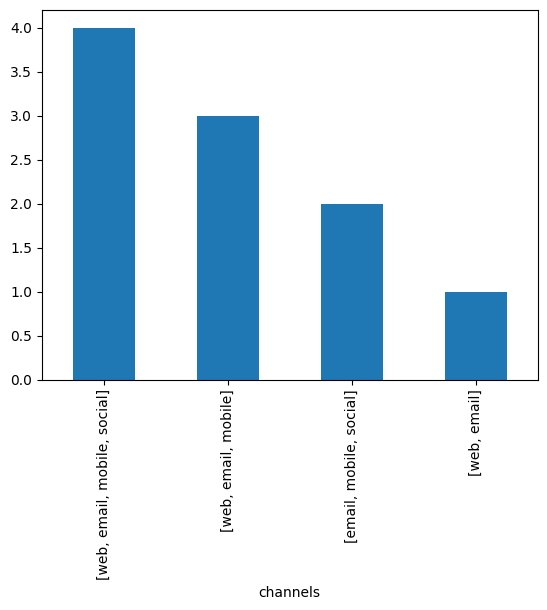

In [1052]:
portfolio['channels'].value_counts().plot(kind='bar')

<Axes: xlabel='offer_type'>

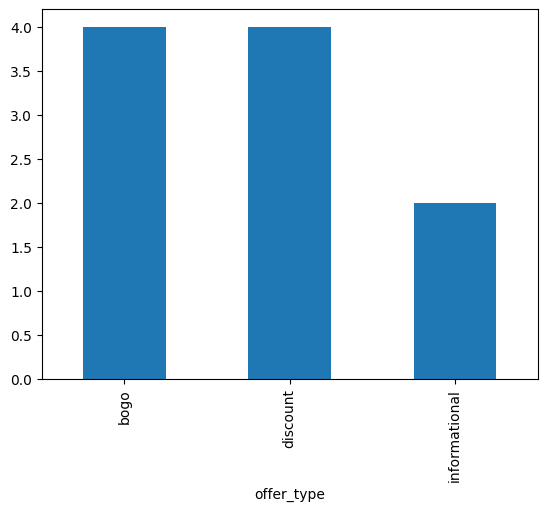

In [1053]:
portfolio['offer_type'].value_counts().plot(kind='bar')

In [1054]:
portfolio[['offer_reward', 'difficulty', 'duration']].corr()

,offer_reward,difficulty,duration
offer_reward,1.000000,0.465686,0.160262
difficulty,0.465686,1.000000,0.808414
duration,0.160262,0.808414,1.000000


<Axes: xlabel='offer_type', ylabel='offer_reward'>

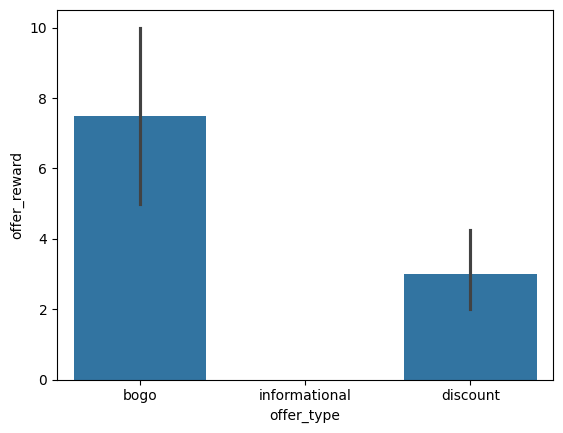

In [1055]:
sns.barplot(data=portfolio, x='offer_type', y='offer_reward')
# for informational type offers there is no reward and difficulty 
# for bogo type offer reward= difficulty
# for disount type offer reward is less than difficulty

<Axes: xlabel='offer_type', ylabel='duration'>

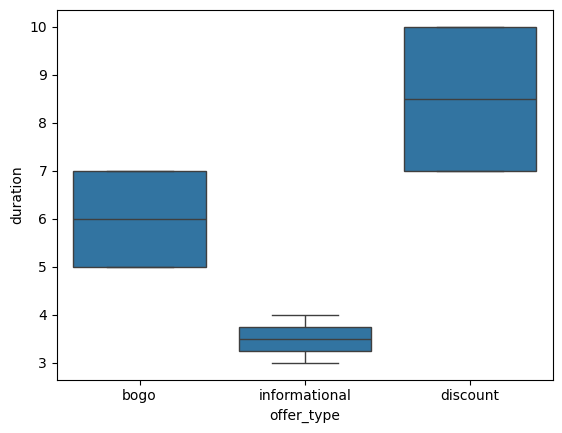

In [1056]:
sns.boxplot(data=portfolio, x='offer_type', y='duration')

<Axes: xlabel='difficulty', ylabel='offer_reward'>

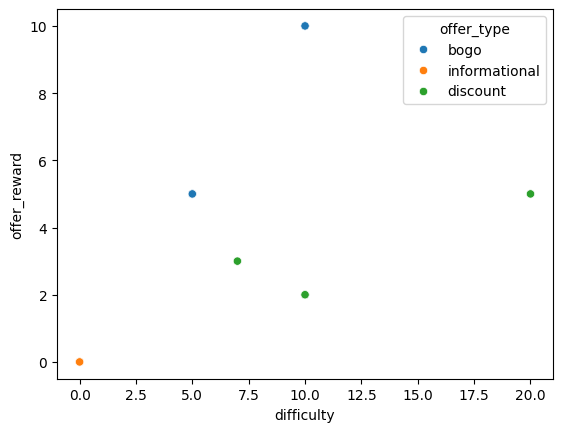

In [1057]:
sns.scatterplot(data=portfolio, x='difficulty', y='offer_reward', hue='offer_type')

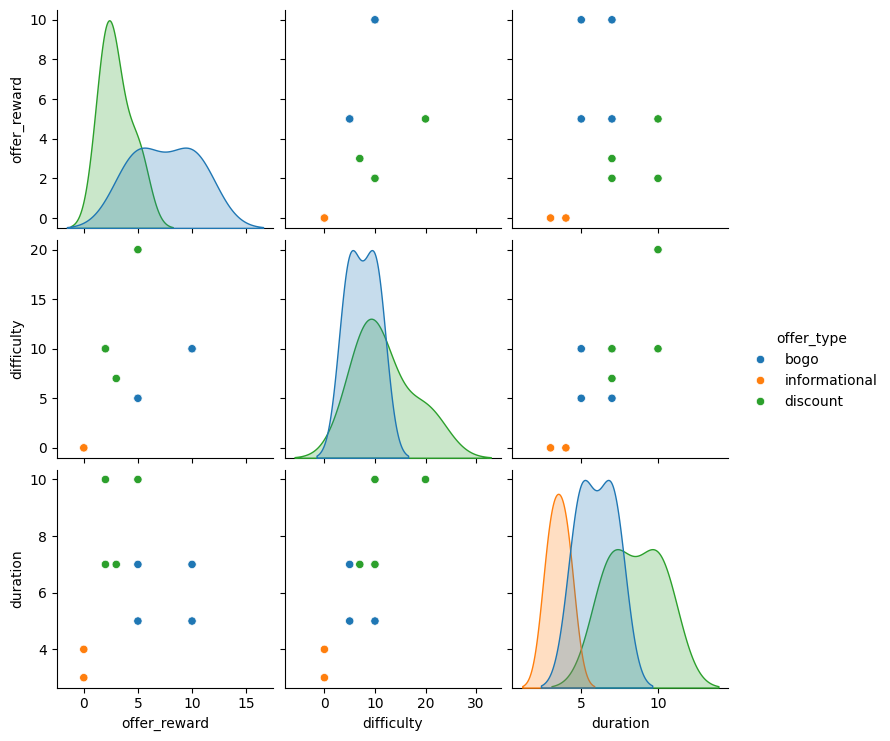

In [1058]:
sns.pairplot(portfolio,hue='offer_type')

On profile Dataset

In [1059]:
profile

,gender,age,customer_id,income,days_member
0,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2917
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2984
2,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2632
3,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2708
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2798
...,...,...,...,...,...
14608,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2593
14609,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2554
14610,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,3087
14611,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,3412


Text(0.5, 1.0, 'Age Distribution')

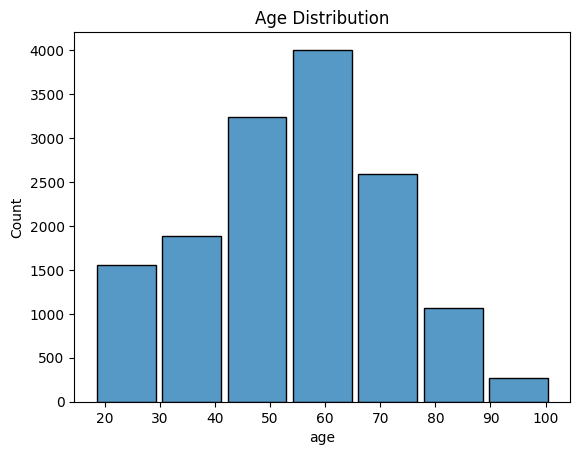

In [1060]:
sns.histplot(profile['age'], bins=7,shrink=0.9)
plt.title('Age Distribution')

In [1061]:
bins = [18, 25, 39, 59, 75, 110]  
labels = ['18-25', '26-39', '40-59', '60-75', '>75']

profile['age_group'] = pd.cut(profile['age'], bins=bins, labels=labels, right=True)

Text(0.5, 1.0, 'Age Distribution')

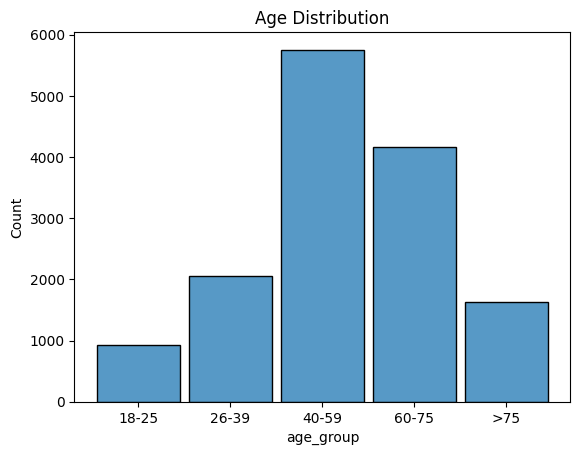

In [1062]:
sns.histplot(profile['age_group'],shrink=0.9)
plt.title('Age Distribution')
# customers are more from 40-59 yrs

In [1063]:
profile.groupby('age_group')['income'].mean()

age_group
18-25    50463.519313
26-39    53242.836328
40-59    67191.518943
60-75    70223.554809
>75      71611.418048
Name: income, dtype: float64

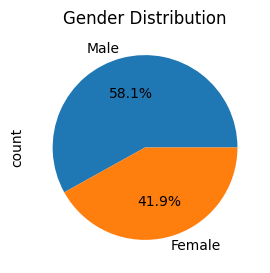

In [1064]:
plt.figure(figsize=(5,3))
plt.title('Gender Distribution')
profile['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%',labels=['Male','Female'])
plt.show()
# male customers are more than female customers

There are more males (58.1%) than females (41.9%) customers.

Text(0.5, 1.0, 'Income Distribution')

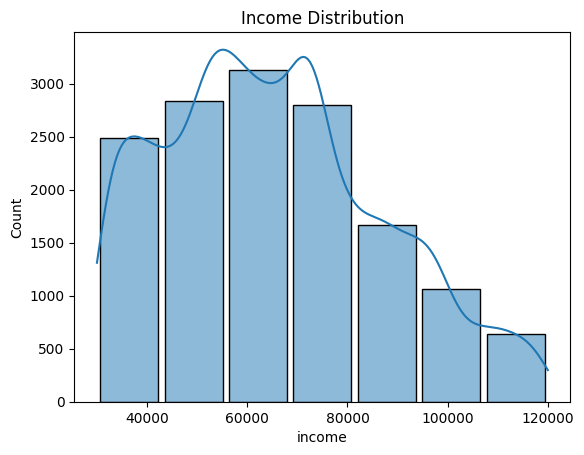

In [1065]:
sns.histplot(profile['income'], bins=7, kde=True,shrink=0.9)
plt.title('Income Distribution')

Text(0.5, 1.0, 'Duration (days)')

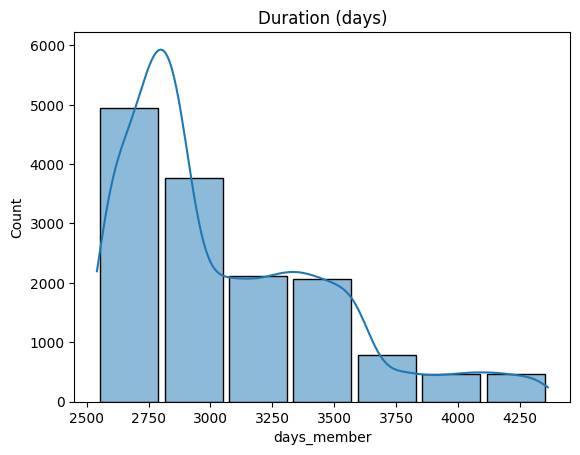

In [1066]:
sns.histplot(profile['days_member'], bins=7, kde=True,shrink=0.9)
plt.title('Duration (days)')

<Axes: xlabel='age_group', ylabel='income'>

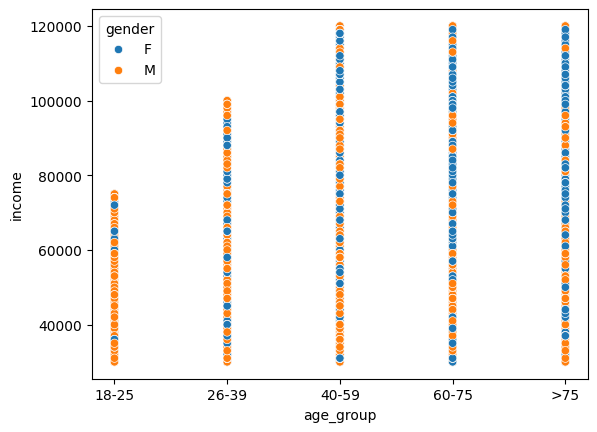

In [1067]:
sns.scatterplot(data=profile, x='age_group', y='income', hue='gender')

<Axes: xlabel='gender', ylabel='income'>

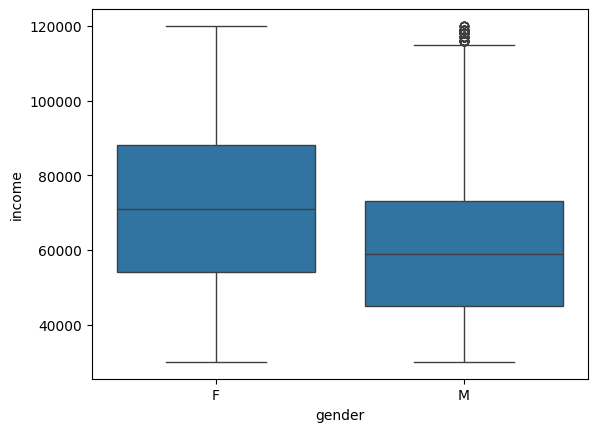

In [1068]:
sns.boxplot(data=profile, x='gender', y='income')


<Axes: title={'center': 'Income vs Age'}, xlabel='age_group', ylabel='income'>

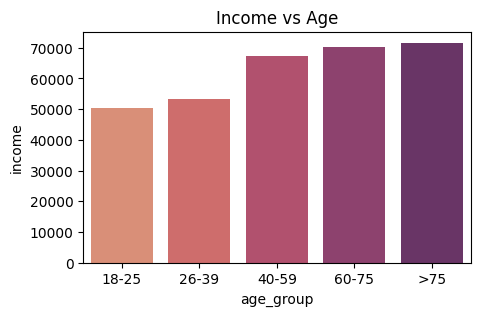

In [1069]:
plt.figure(figsize=(5,3))
plt.title('Income vs Age')
sns.barplot(data=profile,x='age_group',y='income',errorbar=None,palette='flare')

On transcript Dataset

In [1070]:
transcript

,customer_id,event,time,value_type,value_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5
2,389bc3fa690240e798340f5a15918d5c,offer received,0,offer id,f19421c1d4aa40978ebb69ca19b0e20d
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,offer id,3f207df678b143eea3cee63160fa8bed
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
...,...,...,...,...,...
268786,24f56b5e1849462093931b164eb803b5,offer completed,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4
268787,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59
268788,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53
268789,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61


In [1071]:
transcript['event'].value_counts()

event
transaction        122176
offer received      65585
offer viewed        49087
offer completed     31943
Name: count, dtype: int64

<Axes: xlabel='event'>

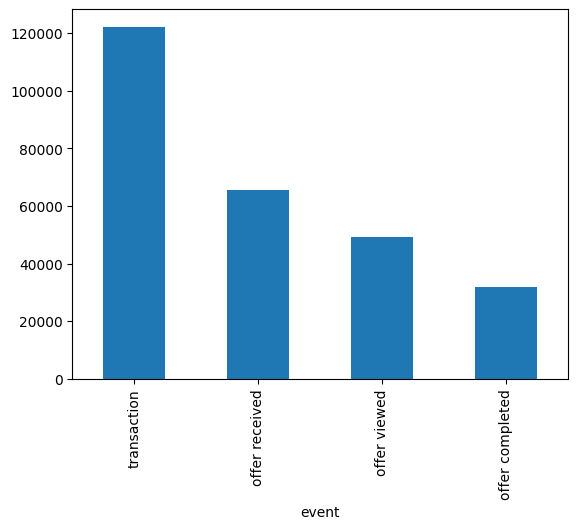

In [1072]:
transcript['event'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Transaction Activity Over Time')

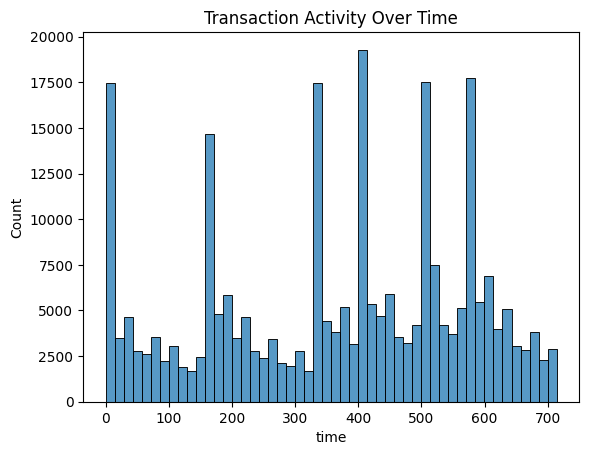

In [1073]:
sns.histplot(data=transcript, x='time', bins=50)
plt.title('Transaction Activity Over Time')

In [1074]:
transcript['days_since_start']=transcript['time']/24

In [1075]:
transcript['days_since_start']=transcript['days_since_start'].astype(int)

Text(0.5, 1.0, 'Day wise event occurences')

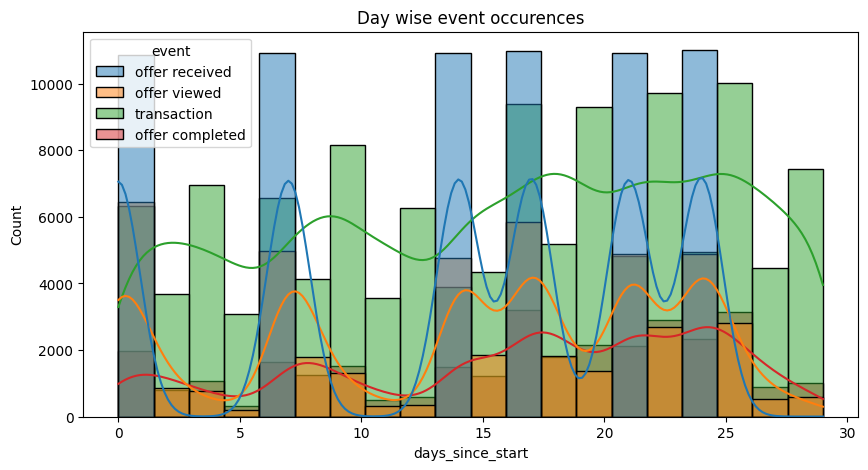

In [1076]:
plt.figure(figsize=(10,5))
sns.histplot(data=transcript,x='days_since_start',bins=20,kde=True,hue='event')
plt.title('Day wise event occurences')

In [1077]:
transcript.describe()
# offer start from 0 and continue till 29 days

,time,days_since_start
count,268791.000000,268791.000000
mean,366.825139,15.016637
std,200.345114,8.331157
min,0.000000,0.000000
25%,186.000000,7.000000
50%,408.000000,17.000000
75%,528.000000,22.000000
max,714.000000,29.000000


# 4. Data Preprocessing

In [1078]:
merge_data=pd.merge(transcript_offers,portfolio,on='offer_id')

In [1079]:
merge_data

,customer_id,event,time,offer_id,offer_reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
1,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount
2,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
...,...,...,...,...,...,...,...,...,...
146610,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714,5a8bc65990b245e5a138643cd4eb9837,0,"[email, mobile, social]",0,3,informational
146611,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational
146612,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
146613,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,2,"[web, email, mobile, social]",10,10,discount


In [1080]:
merge_data['offer_id'].value_counts()

offer_id
fafdcd668e3743c1bb461111dcafc2a4    17820
2298d6c36e964ae4a3e7e9706d1fb8c2    17671
f19421c1d4aa40978ebb69ca19b0e20d    16749
4d5c57ea9a6940dd891ad53e9dbe8da0    16044
ae264e3637204a6fb9bb56bc8210ddfd    16006
9b98b8c7a33c4b65b9aebfe6a799e6d9    14121
2906b810c7d4411798c6938adc9daaa5    13789
5a8bc65990b245e5a138643cd4eb9837    12326
0b1e1539f2cc45b7b9fa7c272da2e1d7    12111
3f207df678b143eea3cee63160fa8bed     9978
Name: count, dtype: int64

Text(0.5, 1.0, 'Offer id vs counts')

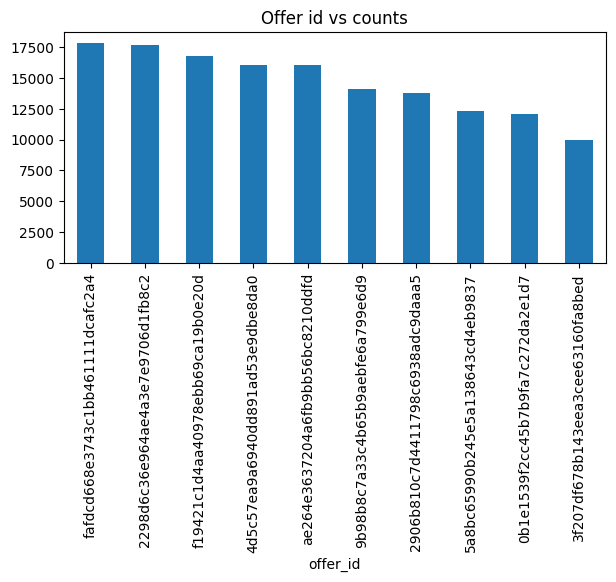

In [1081]:
merge_data['offer_id'].value_counts().plot(kind='bar',figsize=(7,3))
plt.title('Offer id vs counts')

**Completion Rate**:

(Number of times an offer being completed divided by Number of times offer being viewed)

In [1082]:
offer_viewed=merge_data[(merge_data['event']=='offer viewed')]

In [1083]:
p1=offer_viewed.value_counts('offer_id').sort_values()

In [1084]:
p1.sort_index()

offer_id
0b1e1539f2cc45b7b9fa7c272da2e1d7    2161
2298d6c36e964ae4a3e7e9706d1fb8c2    6289
2906b810c7d4411798c6938adc9daaa5    3395
3f207df678b143eea3cee63160fa8bed    3417
4d5c57ea9a6940dd891ad53e9dbe8da0    6258
5a8bc65990b245e5a138643cd4eb9837    5782
9b98b8c7a33c4b65b9aebfe6a799e6d9    3423
ae264e3637204a6fb9bb56bc8210ddfd    5818
f19421c1d4aa40978ebb69ca19b0e20d    6225
fafdcd668e3743c1bb461111dcafc2a4    6319
Name: count, dtype: int64

In [1085]:
offer_completed=merge_data[(merge_data['event']=='offer completed')]

In [1086]:
p2=offer_completed.value_counts('offer_id').sort_values()

In [1087]:
p2.sort_index()

offer_id
0b1e1539f2cc45b7b9fa7c272da2e1d7    3323
2298d6c36e964ae4a3e7e9706d1fb8c2    4819
2906b810c7d4411798c6938adc9daaa5    3851
4d5c57ea9a6940dd891ad53e9dbe8da0    3265
9b98b8c7a33c4b65b9aebfe6a799e6d9    4114
ae264e3637204a6fb9bb56bc8210ddfd    3598
f19421c1d4aa40978ebb69ca19b0e20d    4036
fafdcd668e3743c1bb461111dcafc2a4    4937
Name: count, dtype: int64

In [1088]:
completion_rate=(p2.sort_index()/p1.sort_index()).sort_values(ascending=False)

In [1089]:
completion_rate

offer_id
0b1e1539f2cc45b7b9fa7c272da2e1d7    1.537714
9b98b8c7a33c4b65b9aebfe6a799e6d9    1.201870
2906b810c7d4411798c6938adc9daaa5    1.134315
fafdcd668e3743c1bb461111dcafc2a4    0.781295
2298d6c36e964ae4a3e7e9706d1fb8c2    0.766259
f19421c1d4aa40978ebb69ca19b0e20d    0.648353
ae264e3637204a6fb9bb56bc8210ddfd    0.618426
4d5c57ea9a6940dd891ad53e9dbe8da0    0.521732
3f207df678b143eea3cee63160fa8bed         NaN
5a8bc65990b245e5a138643cd4eb9837         NaN
Name: count, dtype: float64

<Axes: xlabel='offer_id'>

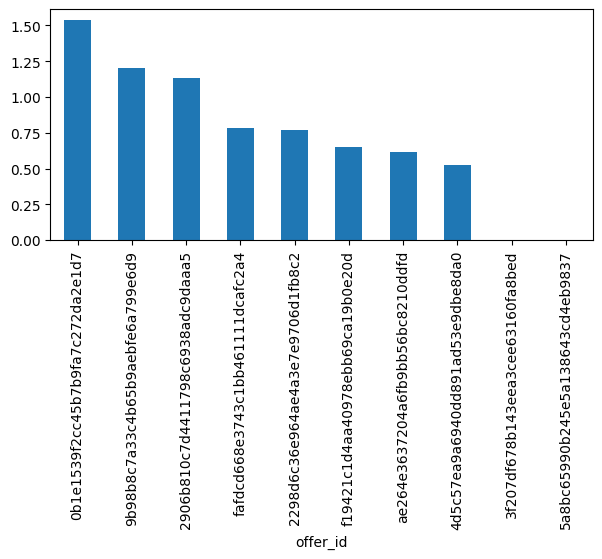

In [1090]:
completion_rate.plot(kind='bar',figsize=(7,3))

**View Rate**

(number of times an offer being viewed divided by number of times being received)


In [1091]:
offer_received=merge_data[(merge_data['event']=='offer received')]

In [1092]:
p3=offer_received.value_counts('offer_id').sort_values()

In [1093]:
p3.sort_index()

offer_id
0b1e1539f2cc45b7b9fa7c272da2e1d7    6627
2298d6c36e964ae4a3e7e9706d1fb8c2    6563
2906b810c7d4411798c6938adc9daaa5    6543
3f207df678b143eea3cee63160fa8bed    6561
4d5c57ea9a6940dd891ad53e9dbe8da0    6521
5a8bc65990b245e5a138643cd4eb9837    6544
9b98b8c7a33c4b65b9aebfe6a799e6d9    6584
ae264e3637204a6fb9bb56bc8210ddfd    6590
f19421c1d4aa40978ebb69ca19b0e20d    6488
fafdcd668e3743c1bb461111dcafc2a4    6564
Name: count, dtype: int64

In [1094]:
view_rate=(p1.sort_index()/p3.sort_index())

In [1095]:
view_rate

offer_id
0b1e1539f2cc45b7b9fa7c272da2e1d7    0.326090
2298d6c36e964ae4a3e7e9706d1fb8c2    0.958251
2906b810c7d4411798c6938adc9daaa5    0.518875
3f207df678b143eea3cee63160fa8bed    0.520805
4d5c57ea9a6940dd891ad53e9dbe8da0    0.959669
5a8bc65990b245e5a138643cd4eb9837    0.883557
9b98b8c7a33c4b65b9aebfe6a799e6d9    0.519897
ae264e3637204a6fb9bb56bc8210ddfd    0.882853
f19421c1d4aa40978ebb69ca19b0e20d    0.959464
fafdcd668e3743c1bb461111dcafc2a4    0.962675
Name: count, dtype: float64

<Axes: xlabel='offer_id'>

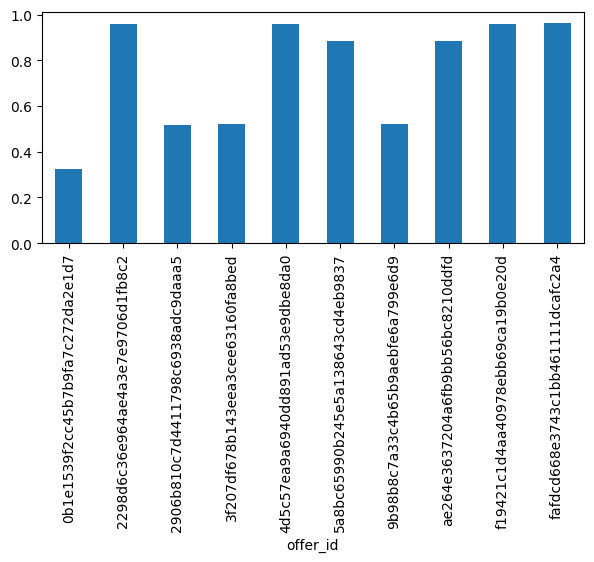

In [1096]:
view_rate.plot(kind='bar',figsize=(7,3))


In [1097]:
offer_received

,customer_id,event,time,offer_id,offer_reward,channels,difficulty,duration,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"[web, email, mobile]",5,7,bogo
1,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount
2,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,5,"[web, email, mobile, social]",5,5,bogo
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0,"[web, email, mobile]",0,4,informational
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"[web, email]",20,10,discount
...,...,...,...,...,...,...,...,...,...
130426,d087c473b4d247ccb0abfef59ba12b0e,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,10,"[email, mobile, social]",10,7,bogo
130427,cb23b66c56f64b109d673d5e56574529,offer received,576,2906b810c7d4411798c6938adc9daaa5,2,"[web, email, mobile]",10,7,discount
130428,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"[web, email, mobile, social]",7,7,discount
130429,9dc1421481194dcd9400aec7c9ae6366,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,10,"[email, mobile, social]",10,7,bogo


In [1098]:
offer_received.groupby(['offer_type','offer_id'])['customer_id'].count()

offer_type     offer_id                        
bogo           4d5c57ea9a6940dd891ad53e9dbe8da0    6521
               9b98b8c7a33c4b65b9aebfe6a799e6d9    6584
               ae264e3637204a6fb9bb56bc8210ddfd    6590
               f19421c1d4aa40978ebb69ca19b0e20d    6488
discount       0b1e1539f2cc45b7b9fa7c272da2e1d7    6627
               2298d6c36e964ae4a3e7e9706d1fb8c2    6563
               2906b810c7d4411798c6938adc9daaa5    6543
               fafdcd668e3743c1bb461111dcafc2a4    6564
informational  3f207df678b143eea3cee63160fa8bed    6561
               5a8bc65990b245e5a138643cd4eb9837    6544
Name: customer_id, dtype: int64

In [1099]:
dat=completion_rate.reset_index().merge(view_rate.reset_index(),on='offer_id')

In [1100]:
dat

,offer_id,count_x,count_y
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.537714,0.326090
1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.201870,0.519897
2,2906b810c7d4411798c6938adc9daaa5,1.134315,0.518875
3,fafdcd668e3743c1bb461111dcafc2a4,0.781295,0.962675
4,2298d6c36e964ae4a3e7e9706d1fb8c2,0.766259,0.958251
5,f19421c1d4aa40978ebb69ca19b0e20d,0.648353,0.959464
6,ae264e3637204a6fb9bb56bc8210ddfd,0.618426,0.882853
7,4d5c57ea9a6940dd891ad53e9dbe8da0,0.521732,0.959669
8,3f207df678b143eea3cee63160fa8bed,NaN,0.520805
9,5a8bc65990b245e5a138643cd4eb9837,NaN,0.883557


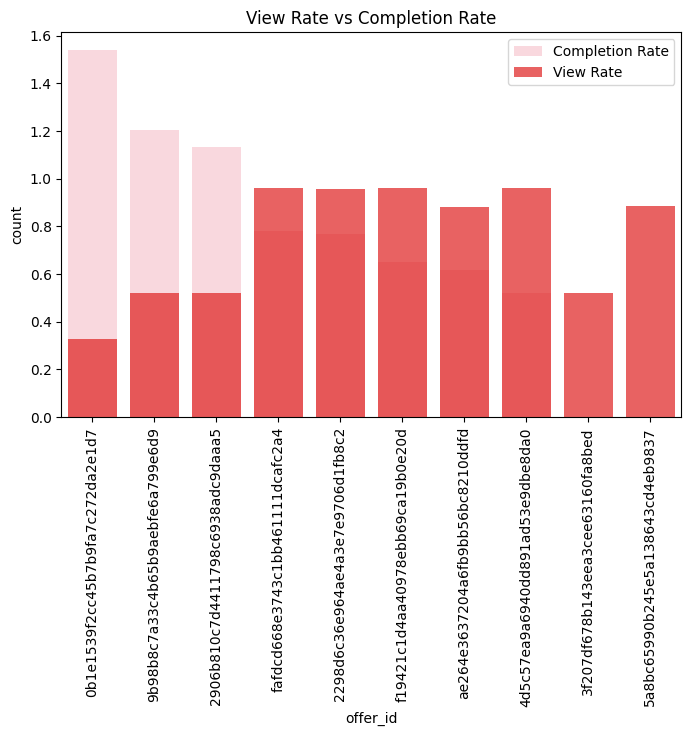

In [1101]:
plt.figure(figsize=(8,5))
plt.title('View Rate vs Completion Rate')
sns.barplot(data=dat,x='offer_id',y='count_x',alpha=0.7,color='pink',label='Completion Rate')
sns.barplot(data=dat,x='offer_id',y='count_y',alpha=0.7,color='red',label='View Rate')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.legend()

In [1102]:
dat.rename(columns={'count_x':'completion_rate','count_y':'view_rate'},inplace=True)

In [1103]:
dat1=dat.merge(portfolio,on='offer_id')

In [1104]:
dat1.drop(columns={'offer_type','channels'},axis=1,inplace=True)

In [1105]:
dat1.set_index('offer_id')

,completion_rate,view_rate,offer_reward,difficulty,duration
offer_id,,,,,
0b1e1539f2cc45b7b9fa7c272da2e1d7,1.537714,0.326090,5,20,10
9b98b8c7a33c4b65b9aebfe6a799e6d9,1.201870,0.519897,5,5,7
2906b810c7d4411798c6938adc9daaa5,1.134315,0.518875,2,10,7
fafdcd668e3743c1bb461111dcafc2a4,0.781295,0.962675,2,10,10
2298d6c36e964ae4a3e7e9706d1fb8c2,0.766259,0.958251,3,7,7
f19421c1d4aa40978ebb69ca19b0e20d,0.648353,0.959464,5,5,5
ae264e3637204a6fb9bb56bc8210ddfd,0.618426,0.882853,10,10,7
4d5c57ea9a6940dd891ad53e9dbe8da0,0.521732,0.959669,10,10,5
3f207df678b143eea3cee63160fa8bed,NaN,0.520805,0,0,4


In [1106]:
dat1.iloc[:,2:].corr()

,view_rate,offer_reward,difficulty,duration
view_rate,1.000000,0.228564,-0.294453,-0.255950
offer_reward,0.228564,1.000000,0.465686,0.160262
difficulty,-0.294453,0.465686,1.000000,0.808414
duration,-0.255950,0.160262,0.808414,1.000000


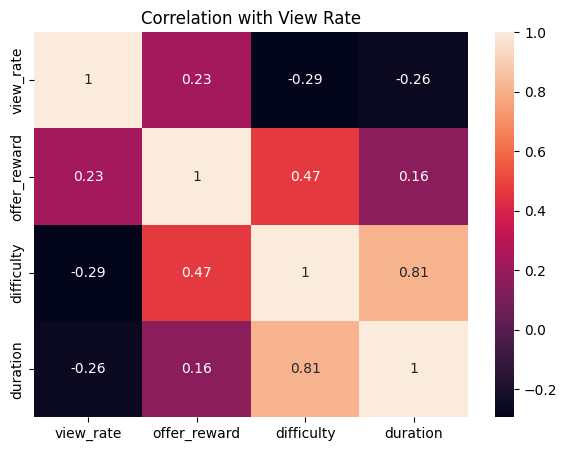

In [1107]:
plt.figure(figsize=(7,5))
plt.title('Correlation with View Rate')
sns.heatmap(dat1.iloc[:,2:].corr(),cmap='rocket',annot=True)
plt.show()

In [1108]:
dat1.iloc[1:,[1,3,4,5]].corr()

,completion_rate,offer_reward,difficulty,duration
completion_rate,1.000000,-0.593049,-0.269533,0.310625
offer_reward,-0.593049,1.000000,0.608875,0.140399
difficulty,-0.269533,0.608875,1.000000,0.730196
duration,0.310625,0.140399,0.730196,1.000000


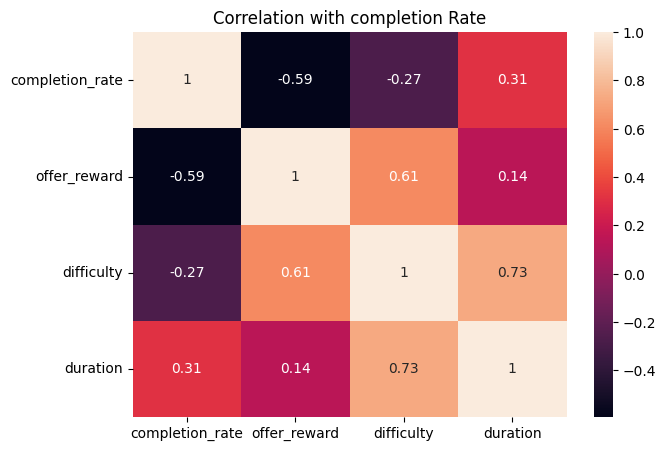

In [1109]:
plt.figure(figsize=(7,5))
plt.title('Correlation with completion Rate')
sns.heatmap(dat1.iloc[1:,[1,3,4,5]].corr(),cmap='rocket',annot=True)
plt.show()

# 5.CUSTOMER SEGMENTATION

In this section, customers will be assigned to segments based on their transactional records during the month of campiagn.Features extracted include (of each customer) number of offers received, number of offers viewed, number of offers completed, number of transactions made (during the month of campiagn) and total amount of money spent.

In [1110]:
transcript

,customer_id,event,time,value_type,value_id,days_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5,0
2,389bc3fa690240e798340f5a15918d5c,offer received,0,offer id,f19421c1d4aa40978ebb69ca19b0e20d,0
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,offer id,3f207df678b143eea3cee63160fa8bed,0
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
...,...,...,...,...,...,...
268786,24f56b5e1849462093931b164eb803b5,offer completed,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4,29
268787,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59,29
268788,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53,29
268789,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61,29


In [1111]:
transcripts_grouped = transcript.groupby(['customer_id', 'event']).size().unstack(fill_value=0)

In [1112]:
transcripts_grouped

event,offer completed,offer received,offer viewed,transaction
customer_id,,,,
0009655768c64bdeb2e877511632db8f,3,5,4,8
0020c2b971eb4e9188eac86d93036a77,3,5,3,8
0020ccbbb6d84e358d3414a3ff76cffd,3,4,4,12
003d66b6608740288d6cc97a6903f4f0,3,5,4,18
00426fe3ffde4c6b9cb9ad6d077a13ea,1,5,2,17
...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,3,6,3,11
fff7576017104bcc8677a8d63322b5e1,3,5,4,6
fff8957ea8b240a6b5e634b6ee8eafcf,0,3,2,5


In [1113]:
transcripts_grouped.columns = ['num_completed', 'num_received', 'num_viewed', 'num_transactions']

In [1114]:
customer_behaviour = transcripts_grouped.copy()

In [1115]:
customer_behaviour

,num_completed,num_received,num_viewed,num_transactions
customer_id,,,,
0009655768c64bdeb2e877511632db8f,3,5,4,8
0020c2b971eb4e9188eac86d93036a77,3,5,3,8
0020ccbbb6d84e358d3414a3ff76cffd,3,4,4,12
003d66b6608740288d6cc97a6903f4f0,3,5,4,18
00426fe3ffde4c6b9cb9ad6d077a13ea,1,5,2,17
...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,3,6,3,11
fff7576017104bcc8677a8d63322b5e1,3,5,4,6
fff8957ea8b240a6b5e634b6ee8eafcf,0,3,2,5


In [1116]:
money_spent = transcript[transcript['event'] == 'transaction'].groupby('customer_id')['value_id'].sum()

In [1117]:
customer_behaviour['money_spent'] = money_spent

In [1118]:
customer_behaviour

,num_completed,num_received,num_viewed,num_transactions,money_spent
customer_id,,,,,
0009655768c64bdeb2e877511632db8f,3,5,4,8,127.6
0020c2b971eb4e9188eac86d93036a77,3,5,3,8,196.86
0020ccbbb6d84e358d3414a3ff76cffd,3,4,4,12,154.05
003d66b6608740288d6cc97a6903f4f0,3,5,4,18,48.34
00426fe3ffde4c6b9cb9ad6d077a13ea,1,5,2,17,68.51
...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,3,6,3,11,580.98
fff7576017104bcc8677a8d63322b5e1,3,5,4,6,29.94
fff8957ea8b240a6b5e634b6ee8eafcf,0,3,2,5,12.15


In [1119]:
customer_behaviour.isnull().sum()

num_completed         0
num_received          0
num_viewed            0
num_transactions      0
money_spent         325
dtype: int64

In [1120]:
customer_behaviour['money_spent'].fillna(0,inplace=True)

<Axes: xlabel='num_viewed', ylabel='Count'>

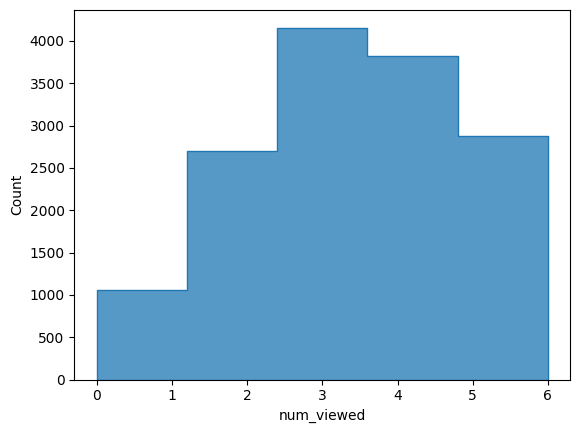

In [1121]:
sns.histplot(data=customer_behaviour,x='num_viewed',bins=5,element='step')

<Axes: xlabel='num_completed', ylabel='Count'>

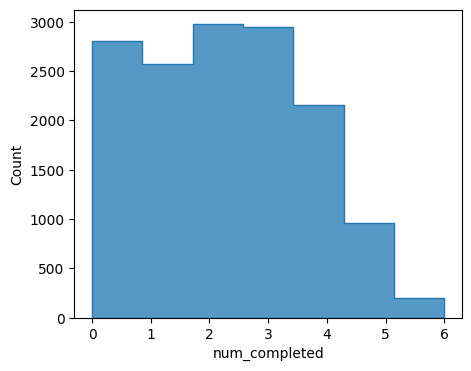

In [1122]:
plt.figure(figsize=(5,4))
sns.histplot(data=customer_behaviour,x='num_completed',bins=7,element='step')

<Axes: xlabel='num_received', ylabel='Count'>

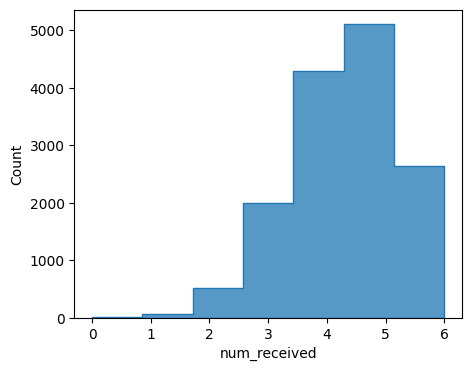

In [1123]:
plt.figure(figsize=(5,4))
sns.histplot(data=customer_behaviour,x='num_received',bins=7,element='step')

<Axes: xlabel='num_transactions', ylabel='Count'>

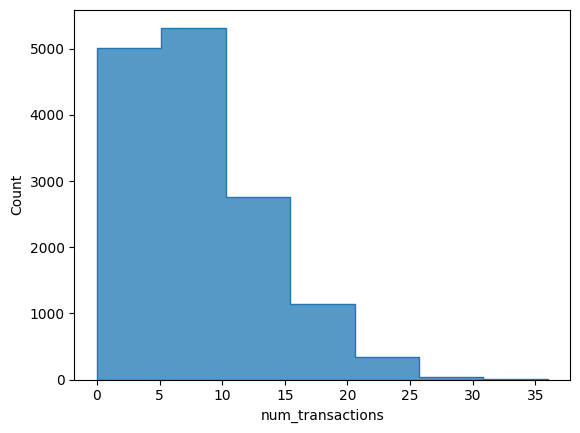

In [1124]:
sns.histplot(data=customer_behaviour,x='num_transactions',bins=7,element='step')

<Axes: xlabel='money_spent', ylabel='Count'>

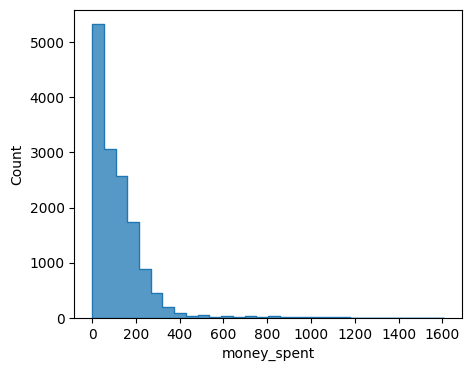

In [1125]:
plt.figure(figsize=(5,4))
sns.histplot(data=customer_behaviour,x='money_spent',bins=30,element='step')


In [1126]:
customer_behaviour.drop(columns=['num_received'],axis=1,inplace=True)

<Axes: xlabel='money_spent'>

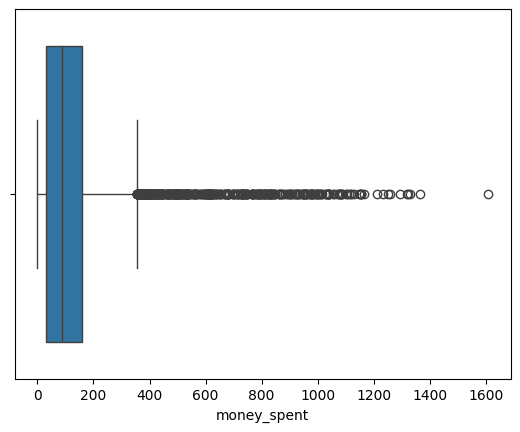

In [1127]:
sns.boxplot(data=customer_behaviour,x='money_spent')

In [1128]:
top=customer_behaviour['money_spent'].quantile(0.98)

In [1129]:
drop=customer_behaviour[customer_behaviour['money_spent']>=top]
customer_behaviour.drop(drop.index,inplace=True)

In [1130]:
drop

,num_completed,num_viewed,num_transactions,money_spent
customer_id,,,,
00e9f403afa641889cd034ee7c7ca6e9,3,4,17,614.59
017febbe52e64ac19cf28cf0d44386e4,3,5,10,1003.41
019ed95d987446e3947da0246cdab831,2,1,8,515.09
01ab25c31f034f85bc4ac9d286fb7a76,4,4,5,644.29
01de69b5edab4b89859ea8a7214ba35a,2,3,7,765.88
...,...,...,...,...
fd64a230ea2f4062be6cec5d0b69540e,1,2,10,524.31
fe97aa22dd3e48c8b143116a8403dd52,1,5,11,562.77
fef79a64b82e4a8ebd8f583101c4a85c,3,4,8,627.91


In [1131]:
customer_behaviour.duplicated().sum()

np.int64(353)

In [1132]:
customer_behaviour.drop_duplicates(inplace=True)

In [1133]:
customer_behaviour.shape

(13967, 4)

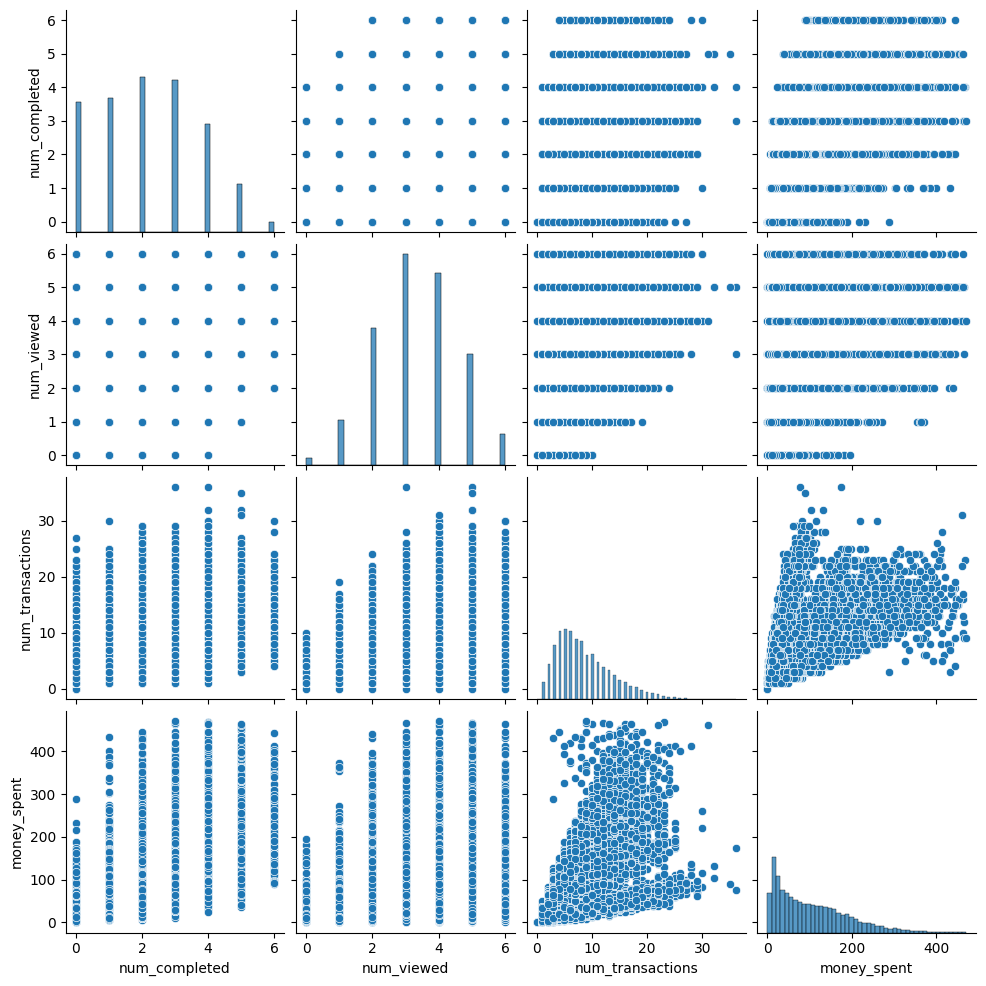

In [1134]:
sns.pairplot(customer_behaviour)
plt.show()

# 6. Model Training

In [1135]:
# data scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [1136]:
scaled_data=sc.fit_transform(customer_behaviour)

In [1137]:
trans=pd.DataFrame(scaled_data)
trans.rename(columns={0:'num_completed',
             1:'num_viewed',
             2:'num_transactions',
             3:'money_spent'},inplace=True)
trans

,num_completed,num_viewed,num_transactions,money_spent
0,0.504830,0.506702,-0.100174,0.250847
1,0.504830,-0.273488,-0.100174,1.059261
2,0.504830,0.506702,0.687402,0.559576
3,0.504830,0.506702,1.868765,-0.674289
4,-0.777862,-1.053678,1.671871,-0.438861
...,...,...,...,...
13962,2.428867,1.286892,0.490508,2.163565
13963,0.504830,0.506702,-0.493962,-0.889057
13964,-1.419208,-1.053678,-0.690856,-1.096704
13965,0.504830,0.506702,0.687402,-0.201683


**K Means Clustering**

In [1138]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1139]:
wcss=[]
sil_score=[]
max_clusters=10

for k in range(1,max_clusters):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(trans)
    wcss.append(kmeans.inertia_)

    if k>=2:
        labels=kmeans.labels_
        sil_score.append(silhouette_score(trans,labels))

In [1140]:
wcss

[55868.00000000002,
 34410.31644991388,
 29305.22092376308,
 24274.700602289864,
 20534.675440871306,
 17975.79274535729,
 16694.377618250724,
 15376.087275429152,
 14703.698052166676]

In [1141]:
sil_score

[np.float64(0.3341866622265174),
 np.float64(0.30273950422045576),
 np.float64(0.2632338217973969),
 np.float64(0.2741278877363913),
 np.float64(0.2699004911747336),
 np.float64(0.2556729710099663),
 np.float64(0.2464397131990706),
 np.float64(0.23465499732335615)]

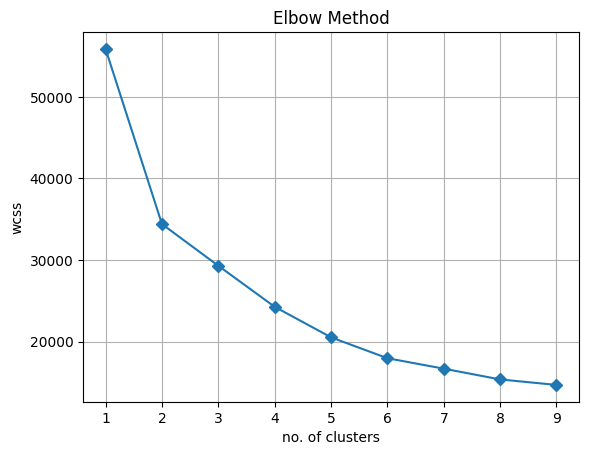

In [1142]:
plt.title('Elbow Method')
plt.plot(np.arange(1,max_clusters),wcss,marker='D')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

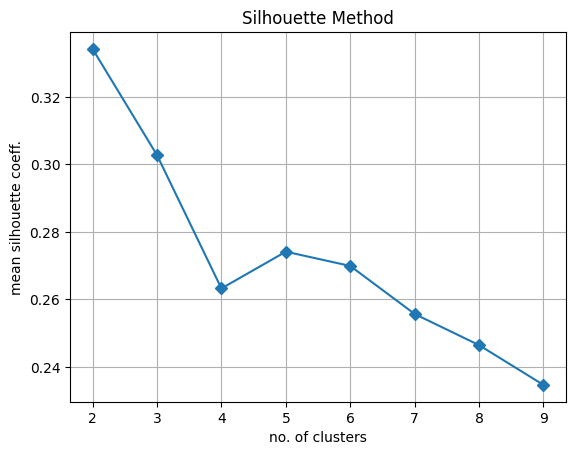

In [1143]:
plt.title('Silhouette Method')
plt.plot(np.arange(2,max_clusters),sil_score,marker='D')
plt.xlabel('no. of clusters')
plt.ylabel('mean silhouette coeff.')
plt.grid()
plt.show()

**OPTIMAL NO OF CUSTOMERS=5**

In [1144]:
k=5
kmm=KMeans(n_clusters=k,random_state=10)
kmm.fit_transform(trans)
clusters=kmm.predict(trans)
clusters

array([0, 0, 4, ..., 3, 2, 4], dtype=int32)

In [1145]:
trans

,num_completed,num_viewed,num_transactions,money_spent
0,0.504830,0.506702,-0.100174,0.250847
1,0.504830,-0.273488,-0.100174,1.059261
2,0.504830,0.506702,0.687402,0.559576
3,0.504830,0.506702,1.868765,-0.674289
4,-0.777862,-1.053678,1.671871,-0.438861
...,...,...,...,...
13962,2.428867,1.286892,0.490508,2.163565
13963,0.504830,0.506702,-0.493962,-0.889057
13964,-1.419208,-1.053678,-0.690856,-1.096704
13965,0.504830,0.506702,0.687402,-0.201683


In [1146]:
trans['cluster_number']=clusters

In [1147]:
customer_behaviour['cluster_number']=clusters

In [1148]:
trans['cluster_number'].value_counts().sort_index()

cluster_number
0    3253
1    2553
2    1540
3    3877
4    2744
Name: count, dtype: int64

In [1149]:
trans

,num_completed,num_viewed,num_transactions,money_spent,cluster_number
0,0.504830,0.506702,-0.100174,0.250847,0
1,0.504830,-0.273488,-0.100174,1.059261,0
2,0.504830,0.506702,0.687402,0.559576,4
3,0.504830,0.506702,1.868765,-0.674289,2
4,-0.777862,-1.053678,1.671871,-0.438861,2
...,...,...,...,...,...
13962,2.428867,1.286892,0.490508,2.163565,4
13963,0.504830,0.506702,-0.493962,-0.889057,1
13964,-1.419208,-1.053678,-0.690856,-1.096704,3
13965,0.504830,0.506702,0.687402,-0.201683,2


In [1150]:
labels=kmm.labels_

In [1151]:
labels

array([0, 0, 4, ..., 3, 2, 4], dtype=int32)

In [1152]:
silhouette_score(trans,labels)

np.float64(0.455291083279472)

In [1153]:
clusters_info=customer_behaviour.groupby('cluster_number')[['num_viewed','num_completed','num_transactions','money_spent']].mean()
clusters_info

,num_viewed,num_completed,num_transactions,money_spent
cluster_number,,,,
0,2.845681,2.932985,7.841377,142.743446
1,4.529965,1.630631,4.944771,56.056248
2,3.527273,2.035714,17.211688,72.233597
3,2.147795,0.722982,5.253547,37.151927
4,4.451895,4.105321,12.330904,225.688735


# 7. Results and Visulization 

<Axes: title={'center': 'Cluster wise bifurcation on Offers Viewed'}, xlabel='num_viewed', ylabel='money_spent'>

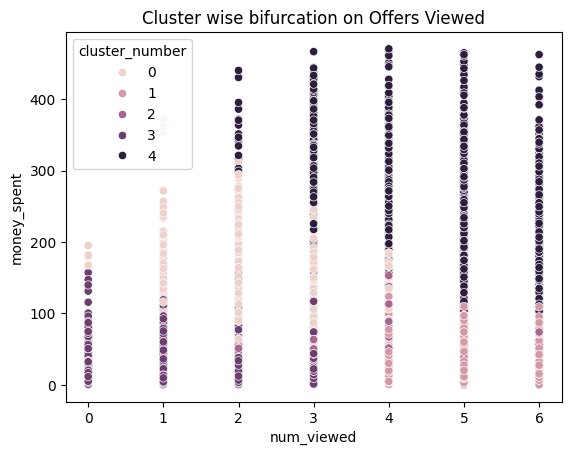

In [1154]:
plt.title('Cluster wise bifurcation on Offers Viewed')
sns.scatterplot(data=customer_behaviour,x='num_viewed',y='money_spent',hue='cluster_number')

In [1155]:
cl0=customer_behaviour[customer_behaviour['cluster_number']==0]
cl1=customer_behaviour[customer_behaviour['cluster_number']==1]
cl2=customer_behaviour[customer_behaviour['cluster_number']==2]
cl3=customer_behaviour[customer_behaviour['cluster_number']==3]
cl4=customer_behaviour[customer_behaviour['cluster_number']==4]

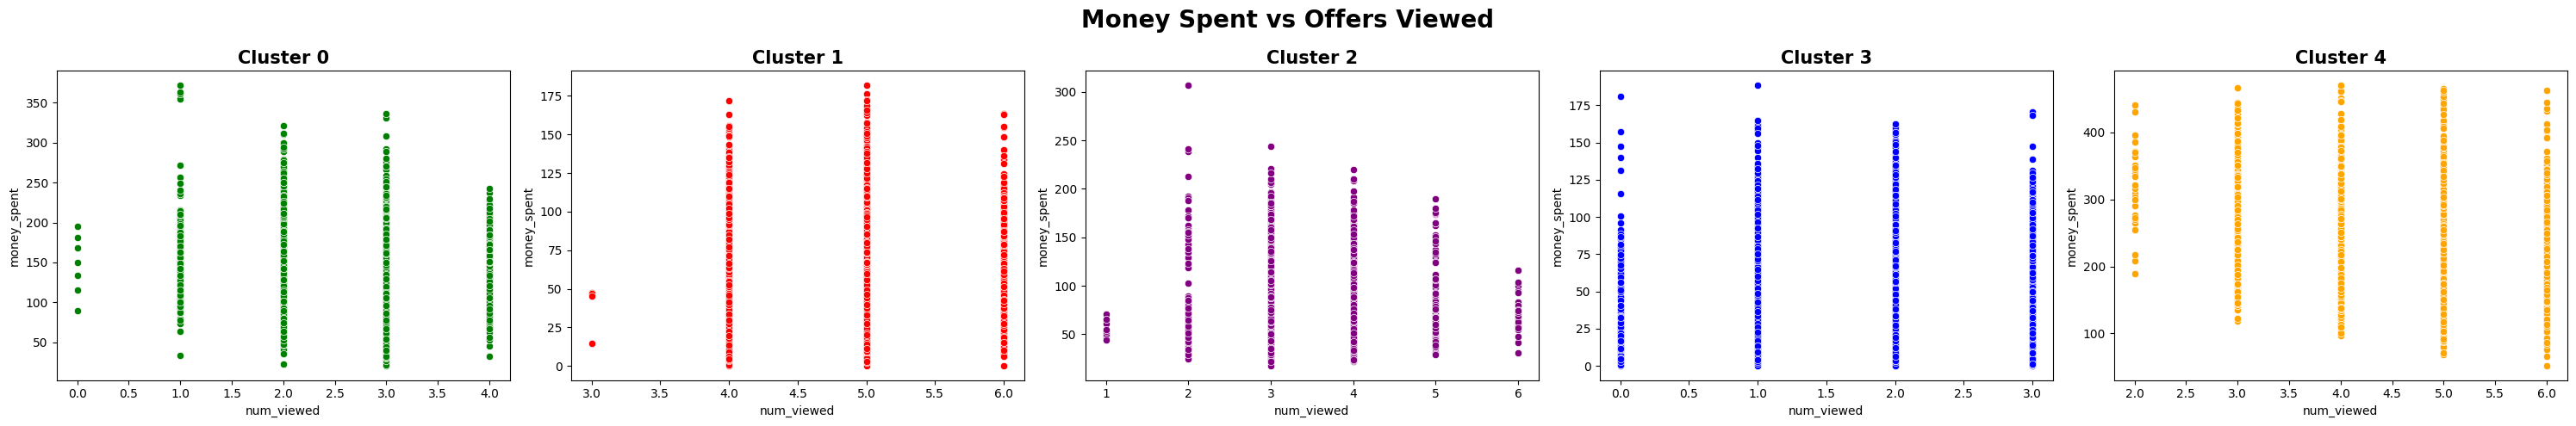

In [1156]:
fig,ax=plt.subplots(1,5,figsize=(30,5))
fig.suptitle('Money Spent vs Offers Viewed',fontsize=20,fontweight='bold')
sns.scatterplot(data=cl0,x='num_viewed',y='money_spent',color='green',ax=ax[0])
sns.scatterplot(data=cl1,x='num_viewed',y='money_spent',color='red',ax=ax[1])
sns.scatterplot(data=cl2,x='num_viewed',y='money_spent',color='purple',ax=ax[2])
sns.scatterplot(data=cl3,x='num_viewed',y='money_spent',color='blue',ax=ax[3])
sns.scatterplot(data=cl4,x='num_viewed',y='money_spent',color='orange',ax=ax[4])

ax[0].set_title('Cluster 0',fontsize=15,fontweight='bold')
ax[1].set_title('Cluster 1',fontsize=15,fontweight='bold')
ax[2].set_title('Cluster 2',fontsize=15,fontweight='bold')
ax[3].set_title('Cluster 3',fontsize=15,fontweight='bold')
ax[4].set_title('Cluster 4',fontsize=15,fontweight='bold')

plt.tight_layout()
plt.show()

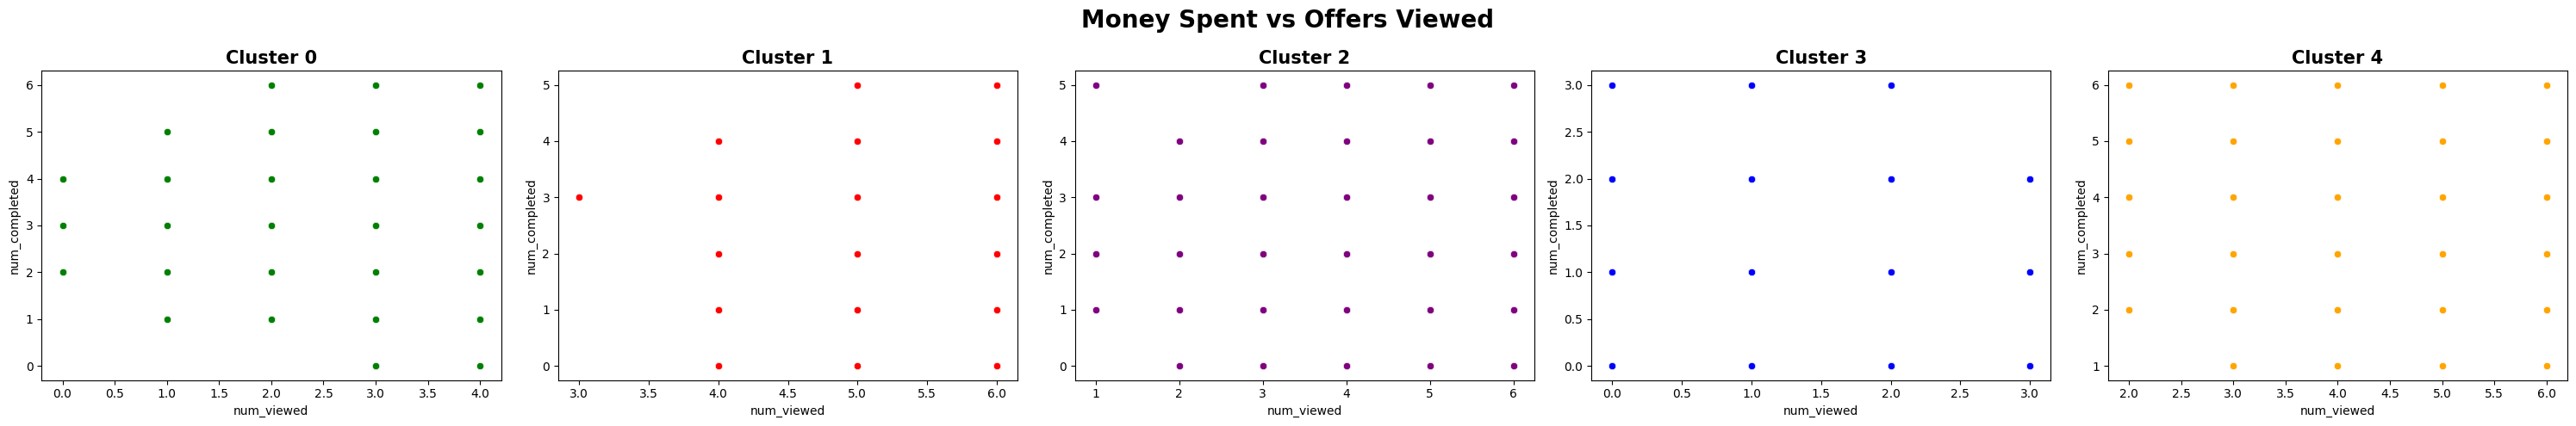

In [1157]:
fig,ax=plt.subplots(1,5,figsize=(30,5))
fig.suptitle('Money Spent vs Offers Viewed',fontsize=20,fontweight='bold')
sns.scatterplot(data=cl0,x='num_viewed',y='num_completed',color='green',ax=ax[0])
sns.scatterplot(data=cl1,x='num_viewed',y='num_completed',color='red',ax=ax[1])
sns.scatterplot(data=cl2,x='num_viewed',y='num_completed',color='purple',ax=ax[2])
sns.scatterplot(data=cl3,x='num_viewed',y='num_completed',color='blue',ax=ax[3])
sns.scatterplot(data=cl4,x='num_viewed',y='num_completed',color='orange',ax=ax[4])

ax[0].set_title('Cluster 0',fontsize=15,fontweight='bold')
ax[1].set_title('Cluster 1',fontsize=15,fontweight='bold')
ax[2].set_title('Cluster 2',fontsize=15,fontweight='bold')
ax[3].set_title('Cluster 3',fontsize=15,fontweight='bold')
ax[4].set_title('Cluster 4',fontsize=15,fontweight='bold')

plt.tight_layout()
plt.show()

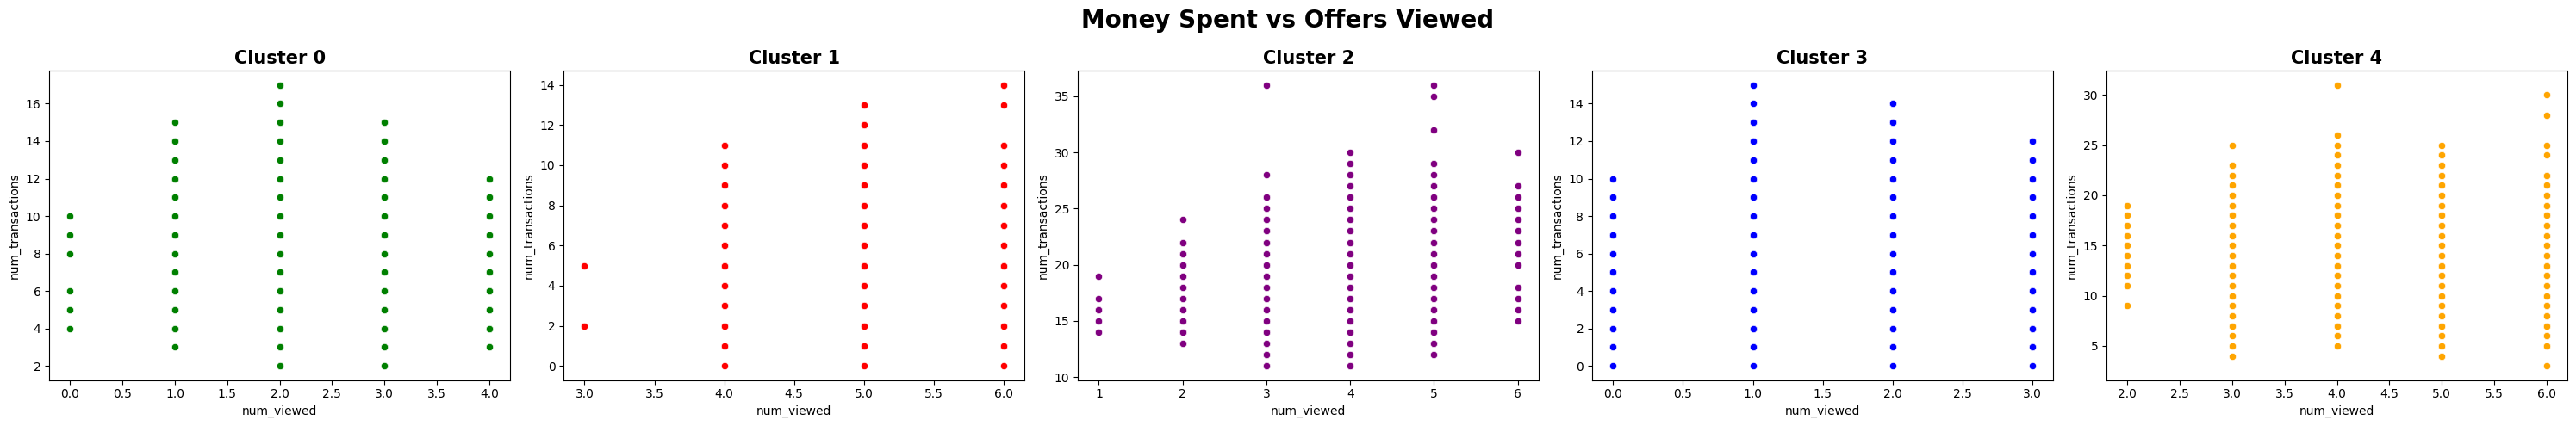

In [1158]:
fig,ax=plt.subplots(1,5,figsize=(30,5))
fig.suptitle('Money Spent vs Offers Viewed',fontsize=20,fontweight='bold')
sns.scatterplot(data=cl0,x='num_viewed',y='num_transactions',color='green',ax=ax[0])
sns.scatterplot(data=cl1,x='num_viewed',y='num_transactions',color='red',ax=ax[1])
sns.scatterplot(data=cl2,x='num_viewed',y='num_transactions',color='purple',ax=ax[2])
sns.scatterplot(data=cl3,x='num_viewed',y='num_transactions',color='blue',ax=ax[3])
sns.scatterplot(data=cl4,x='num_viewed',y='num_transactions',color='orange',ax=ax[4])

ax[0].set_title('Cluster 0',fontsize=15,fontweight='bold')
ax[1].set_title('Cluster 1',fontsize=15,fontweight='bold')
ax[2].set_title('Cluster 2',fontsize=15,fontweight='bold')
ax[3].set_title('Cluster 3',fontsize=15,fontweight='bold')
ax[4].set_title('Cluster 4',fontsize=15,fontweight='bold')

plt.tight_layout()
plt.show()

In [1159]:
population_mean=customer_behaviour[['num_viewed','num_completed','num_transactions','money_spent']].reset_index().drop(columns=['customer_id']).mean()
population_mean

num_viewed            3.350541
num_completed         2.212859
num_transactions      8.508771
money_spent         106.108948
dtype: float64

In [1160]:
relative_corr=((clusters_info)/population_mean)
relative_corr=relative_corr.round(2)

Text(95.72222222222221, 0.5, 'Cluster')

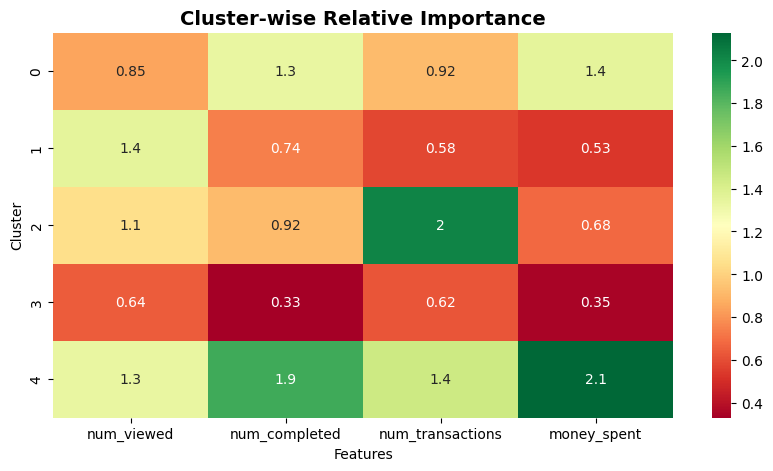

In [1161]:
plt.figure(figsize=(10, len(relative_corr)))
sns.heatmap(relative_corr,annot=True,cmap='RdYlGn')
plt.title("Cluster-wise Relative Importance", fontsize=14,fontweight='bold')
plt.xlabel("Features")
plt.ylabel("Cluster")

In [1162]:
ranking=relative_corr.sum(axis=1).sort_values(ascending=False).index.values

In [1163]:
rank=clusters_info.reindex(ranking)


In [1164]:
rank

,num_viewed,num_completed,num_transactions,money_spent
cluster_number,,,,
4,4.451895,4.105321,12.330904,225.688735
2,3.527273,2.035714,17.211688,72.233597
0,2.845681,2.932985,7.841377,142.743446
1,4.529965,1.630631,4.944771,56.056248
3,2.147795,0.722982,5.253547,37.151927


To better understand customer behavior of each segment and to guide segment-specific strategies, i find some key metrics:

- **Frequency** - Number of transactions made during the month of campaign
- **Average Purchase Value** - Average number of dollars spent on each transaction
- **Offer Complete Rate** - Offer overall completion rate
- **Sensitivity to Offer** - Proportion of transactions made with offers (calculated as num_completed divided by num_transactions

In [1165]:
final_result=pd.DataFrame(columns=['cluster','freq','avg_purchase','offer_comp_rate','offer_senstivity'])

In [1166]:
final_result['cluster']=rank.index
final_result['freq']=rank.reset_index()['num_transactions'].round(2)
final_result['avg_purchase']=((rank.reset_index()['money_spent'])/(rank.reset_index()['num_transactions'])).round(2)
final_result['offer_comp_rate']=((rank.reset_index()['num_completed'])/(rank.reset_index()['num_viewed'])).round(2)
final_result['offer_senstivity']=((rank.reset_index()['num_completed'])/(rank.reset_index()['num_transactions'])).round(2)

In [1167]:
final_result.set_index(['cluster'],inplace=True)

In [1168]:
final_result

,freq,avg_purchase,offer_comp_rate,offer_senstivity
cluster,,,,
4,12.33,18.30,0.92,0.33
2,17.21,4.20,0.58,0.12
0,7.84,18.20,1.03,0.37
1,4.94,11.34,0.36,0.33
3,5.25,7.07,0.34,0.14


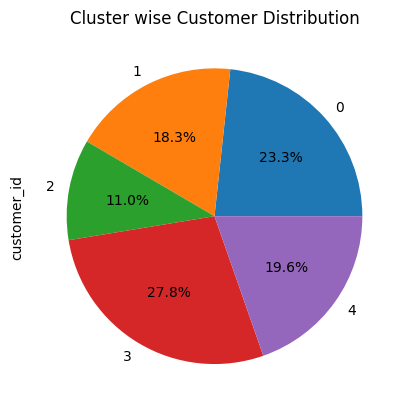

In [1169]:
plt.title('Cluster wise Customer Distribution')
customer_behaviour.reset_index().groupby('cluster_number')['customer_id'].count().plot(kind='pie',autopct='%0.1f%%')
plt.show()

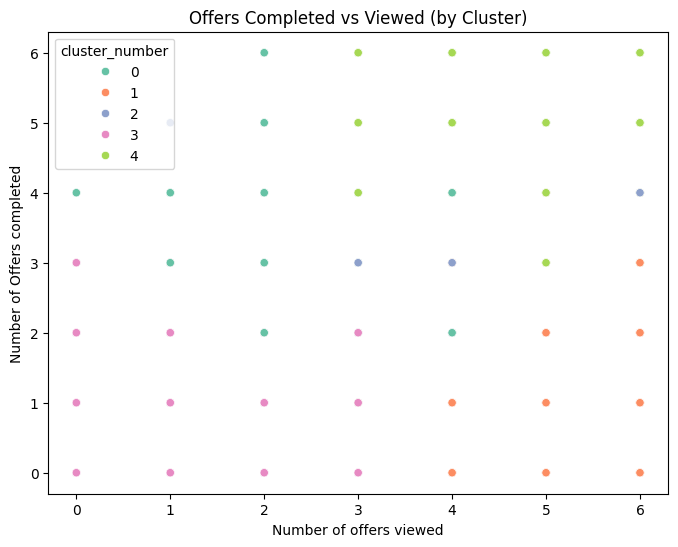

In [1170]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_behaviour, x='num_viewed', y='num_completed', hue='cluster_number', palette='Set2')
plt.title('Offers Completed vs Viewed (by Cluster)')
plt.xlabel('Number of offers viewed')
plt.ylabel('Number of Offers completed')
plt.show()

In [1171]:
customer_behaviour

,num_completed,num_viewed,num_transactions,money_spent,cluster_number
customer_id,,,,,
0009655768c64bdeb2e877511632db8f,3,4,8,127.60,0
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0
0020ccbbb6d84e358d3414a3ff76cffd,3,4,12,154.05,4
003d66b6608740288d6cc97a6903f4f0,3,4,18,48.34,2
00426fe3ffde4c6b9cb9ad6d077a13ea,1,2,17,68.51,2
...,...,...,...,...,...
fff29fb549084123bd046dbc5ceb4faa,6,5,11,291.47,4
fff7576017104bcc8677a8d63322b5e1,3,4,6,29.94,1
fff8957ea8b240a6b5e634b6ee8eafcf,0,2,5,12.15,3


In [1172]:
customer_behavior_profile = pd.merge(customer_behaviour, profile,on='customer_id')
# merge customer_behviour and profile data to check customer wise distribution on basis of gender,age and income in each cluster

In [1173]:
customer_behavior_profile

,customer_id,num_completed,num_viewed,num_transactions,money_spent,cluster_number,gender,age,income,days_member,age_group
0,0009655768c64bdeb2e877511632db8f,3,4,8,127.60,0,M,33,72000.0,3002,26-39
1,0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86,0,F,59,90000.0,3415,40-59
2,0020ccbbb6d84e358d3414a3ff76cffd,3,4,12,154.05,4,F,24,60000.0,3163,18-25
3,003d66b6608740288d6cc97a6903f4f0,3,4,18,48.34,2,F,26,73000.0,2941,26-39
4,00426fe3ffde4c6b9cb9ad6d077a13ea,1,2,17,68.51,2,F,19,65000.0,3257,18-25
...,...,...,...,...,...,...,...,...,...,...,...
13962,fff29fb549084123bd046dbc5ceb4faa,6,5,11,291.47,4,F,59,93000.0,2870,40-59
13963,fff7576017104bcc8677a8d63322b5e1,3,4,6,29.94,1,M,71,73000.0,2809,60-75
13964,fff8957ea8b240a6b5e634b6ee8eafcf,0,2,5,12.15,3,M,71,56000.0,2699,60-75
13965,fffad4f4828548d1b5583907f2e9906b,3,4,12,88.83,2,M,34,34000.0,3090,26-39


In [1174]:
customer_behavior_profile['cluster_number'] = customer_behavior_profile['cluster_number'].map({1: 'Offer-Viewers',
                                                                                       3: 'Low-Engagers',
                                                                                       4: 'Most Valuable',
                                                                                       2: 'Regular',
                                                                                       0: 'High-Potentials'})

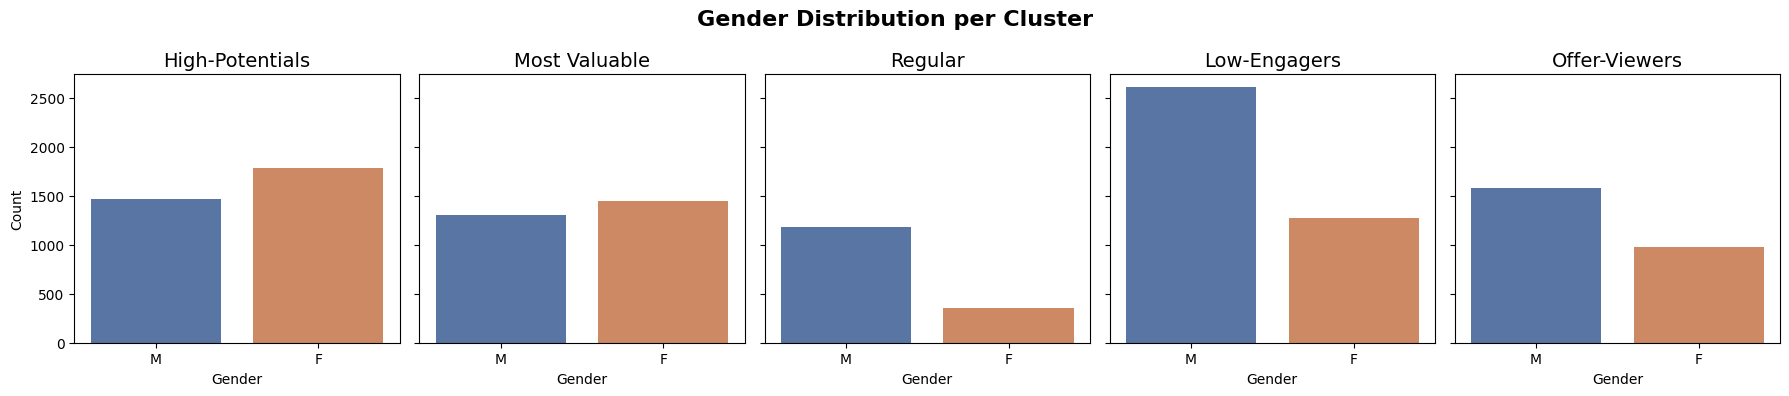

In [1175]:
num_clusters = customer_behavior_profile['cluster_number'].unique()
fig, axs = plt.subplots(1, len(num_clusters), figsize=(18, 4),sharey=True)

for i, cluster in enumerate(num_clusters):
    data = customer_behavior_profile[customer_behavior_profile['cluster_number'] == cluster]
    sns.countplot(data=data, x='gender', order=['M','F'], ax=axs[i],palette='deep')
    axs[i].set_title(f'{cluster}', fontsize=14)
    axs[i].set_xlabel("Gender")
    axs[i].set_ylabel("Count")

plt.suptitle("Gender Distribution per Cluster", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. Intrepretation of Clusters

NOTE: The number of offers received is not used in K-Means clustering.Its variance is very low, beacuse in all clusters, customers in each cluster recieved between 4-5 offers on avreage.

**Most valueable Customers(MVC) - Cluster 1**

- These customers not only viewed but also completed a large number of offers,means they are highly responsive to offers.
- They did not make the most purchases (~12) but spent the most money among all clusters, more than twice the avreage monthly spending.
- They have the highest Average Purchase Value of 18.3 USD.
- The outlier customers (money spent was among top 2%) fit in well here (will be added back).

RECOMMENDATION: The company should try their best to keep these customers by offering exclusive perks, loyalty rewards. Increasing their purchase frequency even slightly could lead to substantial revenue gains.

**Regular customers - Cluster 2**

- These customers made the most number of purchases(~17) more than one purchase every two days-they are the company's regular customers.
- The number of offers they viewed and completed are around overall average. They are not very sensitive to offers. They are willing to buy with or without offers.
- Suprisingly, their total spending over the month is slightly lower than the overall average, due to a low Average Purchase Value of 4.2 USD.

CUSTOMIZATION: These customers are loyal, frequent buyers who shop with or without offers. The company should keep these customers and try to increase their Average Purchase Value.

**High Potenials Customers - Cluster 0**

-These customers had the second highest Average Purchase Value of 18.2 USD (first is 18.3 USD).
- They viewed most offers they received and completed 70% of them.
- They have relatively high sensitivity to offers.

CUSTOMIZATION: These customers have high potential to become Most Valuable Customers if their purchase frequency increases. As their sensitivity and response to offer is relatively high, the company should send them more offers to make them make more purchases, which will in turn enhancing their customer stickiness.

**Offer Viewers customers - Cluster 1** 

- These customers viewed the most offers (4.5).
- However, they comepleted very few of them (1.6).
- They have a moderate Average Purchase Value of 11.3 USD.

CUSTOMIZATION: These customers love to click offers! Send them more offers with really good deals for a variaty of products to attract them to try. This may help them form the habit of purchasing.

**Low Engagers Customers - Cluster 3**

- These customers showed extemely low engagement through all features, despite the fact they received a similar number of offers to customers in other clusters.
- They have a low Average Purchase Value of 7.07 USD.

CUSTOMIZATION: Currently they did not engage much, either becuase they are loyal customers of other brands or they do not have the habbit of purchasing hot beverages outside. The company need to invest more resourse if they wish to change the current situation.